<a href="https://colab.research.google.com/github/SaiBhujbal/NLP-Sentiments/blob/main/NLPL_Assignment_1_095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [ ]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)


    text = re.sub(r'[^A-Za-z\s]', '', text)


    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    return ' '.join(tokens)

In [ ]:
df['cleaned_review'] = df['review'].apply(clean_text)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
confusion_matrices = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, vectorizer_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Classification Report ({vectorizer_name}):\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    confusion_matrices[f'{model.__class__.__name__} ({vectorizer_name})'] = cm

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model.__class__.__name__} ({vectorizer_name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Classification Report (CountVectorizer):

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



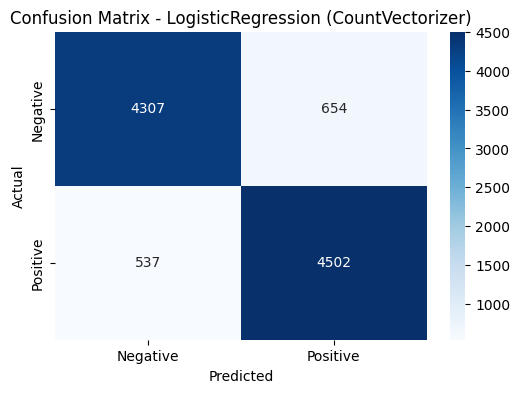

Classification Report (TFIDFVectorizer):

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



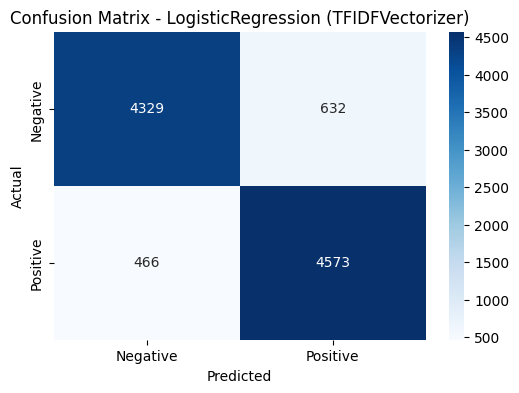

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train_count, X_test_count, y_train, y_test, "CountVectorizer")
evaluate_model(logistic_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "TFIDFVectorizer")

In [ ]:
svc_model = SVC()
evaluate_model(svc_model, X_train_count, X_test_count, y_train, y_test, "CountVectorizer")
evaluate_model(svc_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "TFIDFVectorizer")

In [ ]:
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train_count, X_test_count, y_train, y_test, "CountVectorizer")
evaluate_model(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "TFIDFVectorizer")

In [ ]:
def compare_confusion_matrices(confusion_matrices):
    plt.figure(figsize=(16, 12))

    for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
        plt.subplot(3, 2, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_metrics_from_confusion_matrix(cm):
    tn, fp, fn, tp = cm.ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    return precision, recall, f1_score, accuracy

In [ ]:
def get_insights(confusion_matrices):
    insights = []

    for model_name, cm in confusion_matrices.items():
        precision, recall, f1_score, accuracy = calculate_metrics_from_confusion_matrix(cm)
        insights.append({
            "Model": model_name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "Accuracy": accuracy
        })

    insights_df = pd.DataFrame(insights)

    print("\nComparison of Models based on Confusion Matrix:")
    print(insights_df)

    return insights_df

In [ ]:
compare_confusion_matrices(confusion_matrices)

insights_df = get_insights(confusion_matrices)

def plot_metric_comparison(insights_df, metric):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=insights_df, palette="Set2")
    plt.title(f'{metric} Comparison Across Models', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.tight_layout()
    plt.show()

plot_metric_comparison(insights_df, "Precision")
plot_metric_comparison(insights_df, "Recall")
plot_metric_comparison(insights_df, "F1-Score")
plot_metric_comparison(insights_df, "Accuracy")

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/NLPL_Assignment 1 - 095.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLPL_Assignment 1 - 095.ipynb to PDF
[NbConvertApp] Support files will be in NLPL_Assignment 1 - 095_files/
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Making directory ./NLPL_Assignment 1 - 095_files
[NbConvertApp] Writing 78864 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 ti